<a href="https://colab.research.google.com/github/Adelson021/Proj01/blob/main/mod06_Tarefa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('sinasc_RO_2019.csv', sep=',')

In [ ]:
colunas = df.columns
colunas

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
def categorize_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return 'valor inválido'

# Exemplo de uso:
apgar5_scores = [2, 4, 7, 8, 10, 11]  # Lista de exemplos de valores de APGAR5
categorias = [categorize_apgar5(score) for score in apgar5_scores]
categorias

['asfixia grave',
 'asfixia moderada',
 'asfixia leve',
 'normal',
 'normal',
 'valor inválido']

In [ ]:
df['APGAR5_CATEGORIA'] = df['APGAR5'].apply(categorize_apgar5)
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CATEGORIA
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,normal
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal


In [ ]:
soma_por_categoria = df.groupby('APGAR5_CATEGORIA')['APGAR5'].sum()
soma_por_categoria

APGAR5_CATEGORIA
asfixia grave          105.0
asfixia leve          2161.0
asfixia moderada       317.0
normal              244566.0
valor inválido           0.0
Name: APGAR5, dtype: float64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

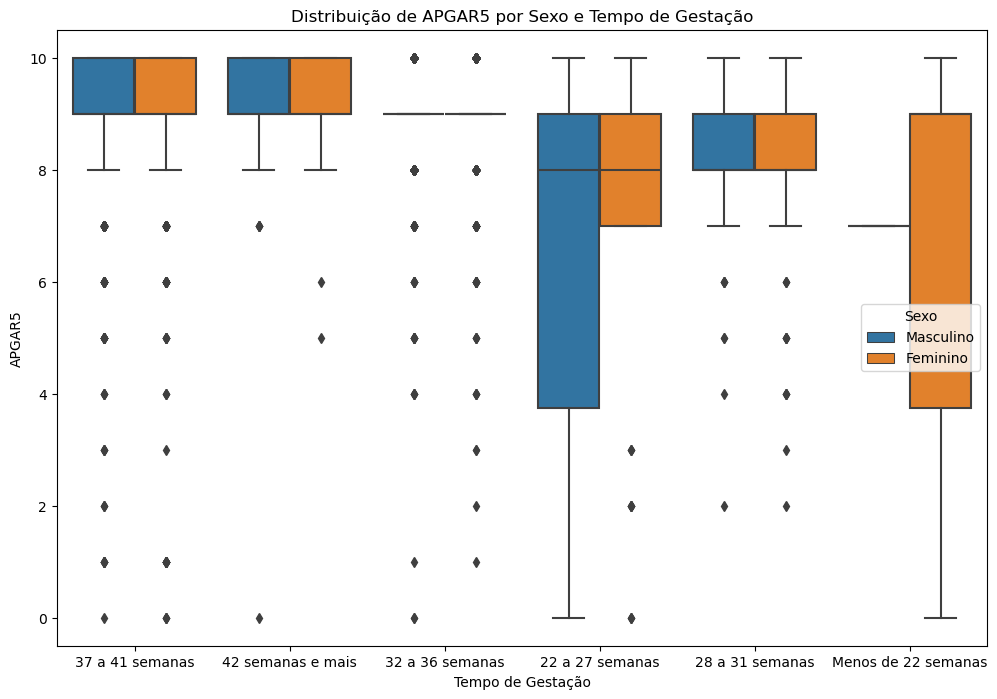

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)

# Configurar o título e os rótulos
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
percentual_linhas = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
percentual_linhas = percentual_linhas.round(2)
percentual_linhas

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.09,0.09,0.36,0.49,0.76,2.51,16.20,58.50,20.81
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95
Menos de 22 semanas,14.29,0.00,14.29,0.00,0.00,0.00,0.00,14.29,0.00,42.86,14.29


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

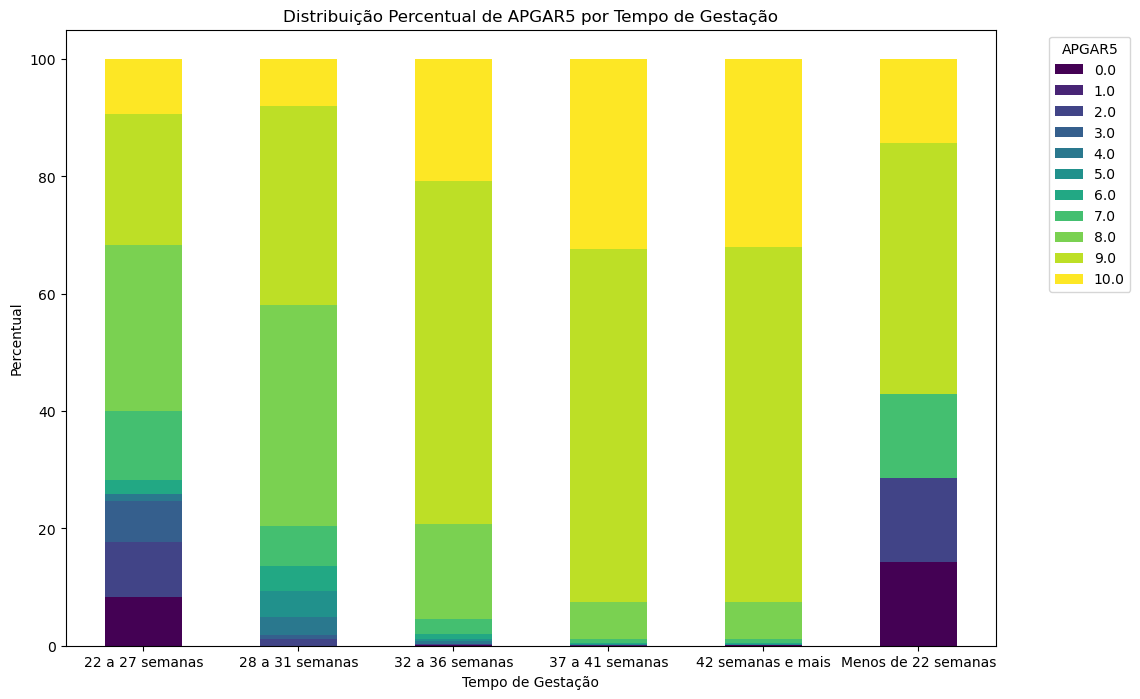

In [ ]:
percentual_linhas.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Configurar o título e os rótulos
plt.title('Distribuição Percentual de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


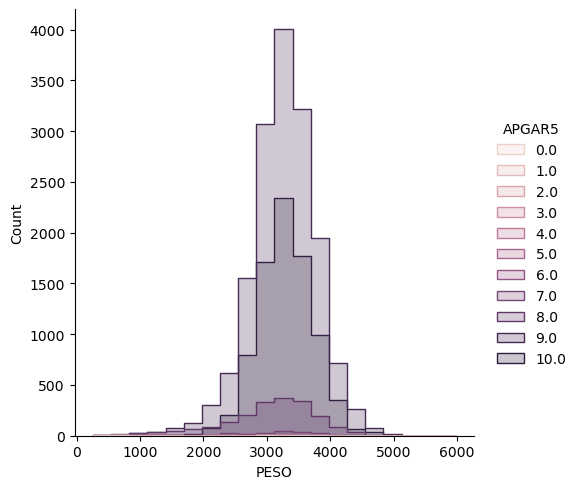

In [ ]:
sns.displot(data = df
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
           )

C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


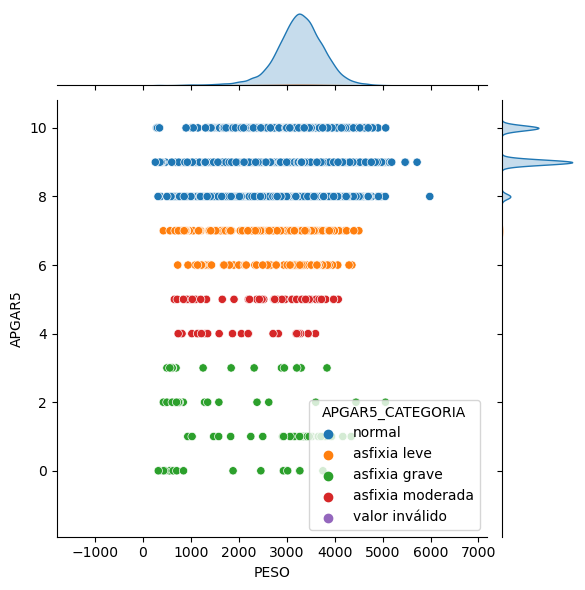

In [ ]:
sns.jointplot(data=df, x="PESO", y="APGAR5", hue = 'APGAR5_CATEGORIA')

Se um bebê tem um peso em torno de 3000 g ou seja 3 kilos, aparentemente terá uma pontuação de Apgar alta.

In [ ]:
# Calcular o peso médio por categoria de APGAR5
peso_medio_por_categoria = df.groupby('APGAR5_CATEGORIA')['PESO'].mean()
peso_medio_por_categoria

APGAR5_CATEGORIA
asfixia grave       2119.500000
asfixia leve        2809.909375
asfixia moderada    2377.617647
normal              3255.144012
valor inválido      2896.980583
Name: PESO, dtype: float64

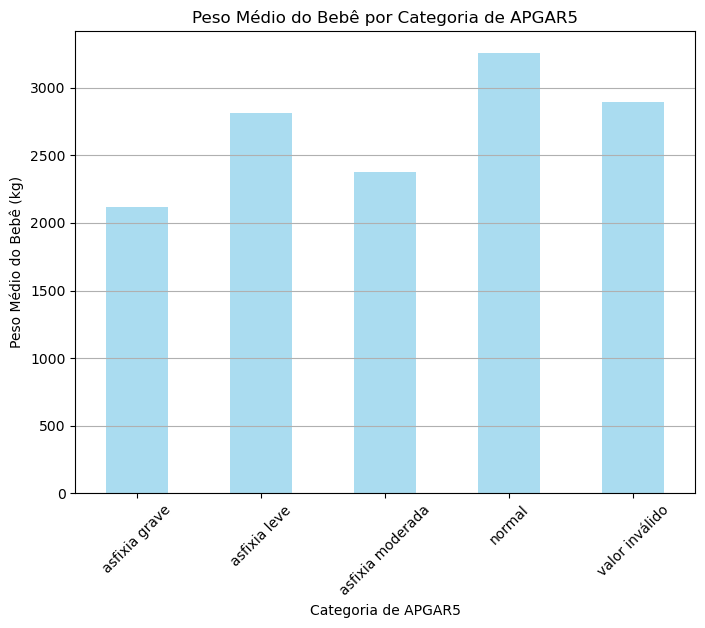

In [ ]:
plt.figure(figsize=(8, 6))
peso_medio_por_categoria.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Peso Médio do Bebê por Categoria de APGAR5')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Peso Médio do Bebê (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()